<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>

# Image Basics Assessment

## Complete the Tasks in bold below. Keep in mind, you may need to run some of these tasks as Python scripts.

----------
#### TASK: Open the *dog_backpack.jpg* image from the DATA folder and display it in the notebook. Make sure to correct for the RGB order.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread('../DATA/dog_backpack.jpg')

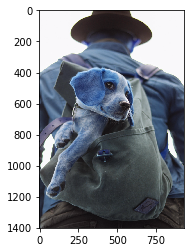

In [3]:
plt.imshow(img)

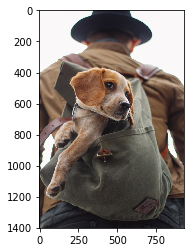

In [4]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

#### TASK: Flip the image upside down and display it in the notebook.

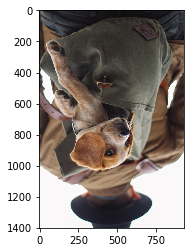

In [5]:
flip_img = cv2.flip(img,0)
plt.imshow(flip_img)

#### TASK: Draw an empty RED rectangle around the dogs face and display the image in the notebook.

In [6]:
img1 = img.copy()

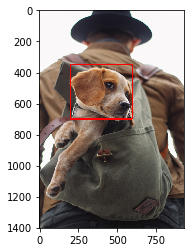

In [7]:
cv2.rectangle(img1,pt1=(200,350),pt2=(600,700),color=(255,0,0),thickness=5)
plt.imshow(img1)

#### TASK: Draw a BLUE TRIANGLE in the middle of the image. The size and angle is up to you, but it should be a triangle (three sides) in any orientation.

(3, 2)
(3, 1, 2)


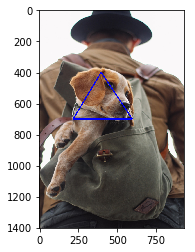

In [8]:
img2 = img.copy()
vertices = np.array([[400,400],[220,700],[600,700]],dtype=np.int32)
print(vertices.shape)
pts = vertices.reshape((-1,1,2))
print(pts.shape)
cv2.polylines(img2,[pts],isClosed=True,color=(0,0,255),thickness=5)
plt.imshow(img2)

### BONUS TASK. Can you figure our how to fill in this triangle? It requires a different function that we didn't show in the lecture! See if you can use google search to find it.

[CLICK ME FOR A DIRECT LINK TO THE HINT](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#fillpoly)

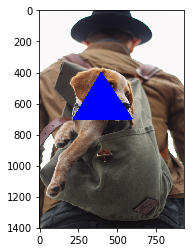

In [16]:
cv2.fillPoly(img2,[pts],color=(0,0,255))
plt.imshow(img2)

#### TASK: (NOTE: YOU WILL NEED TO RUN THIS AS A SCRIPT). Create a script that opens the picture and allows you to draw empty red circles whever you click the RIGHT MOUSE BUTTON DOWN.

In [13]:

drawing = False
ix=-1
iy=-1

def draw_circle(event,x,y,flags,params):
    
    global  ix,iy,drawing
    
    if event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img3,center=(x,y),radius=20,color=(0,0,255),thickness=5)
        
    elif event == cv2.EVENT_LBUTTONDOWN:
        drawing=True
        ix=x
        iy=y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.rectangle(img3,pt1=(ix,iy),pt2=(x,y),color=(0,0,255),thickness=5)
            
    elif event == cv2.EVENT_LBUTTONUP:
        drawing=False
        cv2.rectangle(img3,pt1=(ix,iy),pt2=(x,y),color=(0,0,255),thickness=-1)
        
        
    


img3 = img.copy()

cv2.namedWindow(winname='dog')
cv2.setMouseCallback('dog',draw_circle)

while True:
    cv2.imshow('dog',img3)
    
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
cv2.destroyAllWindows()